In [ ]:
import numpy as np
from NN.models import Basic as NetMu
from NN.models import BasicSP as NetSigma
from NNMuSigmaEst.Net import MuNet
from NNMuSigmaEst.Net import SigmaNet

from NN.trainer import AlternatingTrainer as AltTrain
import sortedplot as sp

from misc.randomSort import randomSort
import tensorflow as tf



In [ ]:
from NNMuSigmaEst.debug import Debug
n_units = 10
n_hidden = 5
dropout_rate = 0.2
rounds =  10
batch_size = 500
maxIter = 50
netMu = NetMu(n_units, n_hidden, dropout_rate)
netSigma = NetSigma(n_units, n_hidden, dropout_rate)
netMu.build((None,1))
netSigma.build((None,1))
muNet = MuNet(netMu)
sigmaNet = SigmaNet(netSigma)
n = 1000
x = np.random.uniform(size=(n,1))*10
mu = x
sigmaSq = x**3
y = mu +  np.sqrt(sigmaSq)*np.random.normal(loc = 0, scale = 1, size=(n,1))
w = np.ones((n,1))
debug = Debug(x,y, w, mu, sigmaSq)
trainer = AltTrain(muNet, sigmaNet, x, y, w, rounds, maxIter, batch_size)
trainer.attachDebugger(debug)
trainer.fit()

In [ ]:
from NNMuSigmaEst.fit import MuSigmaFitting
MSFit = MuSigmaFitting.demo()

In [ ]:
from MonotonicPosterior.fit import PosteriorFitting
postFit = PosteriorFitting.demo()

In [ ]:
from data.datagen import GaussianDG

alpha = 0.5
n_p = 50
n_u = 50
mu = -1
sig = 1
dg = GaussianDG(mu=mu, sig=sig, alpha=alpha, n_p=n_p, n_u=n_u)
#x contains the one dimensional feature. y contains the PU labels (1: positive, 0:unlabeled) and y_p contains 
#the labels of all positives including the one in the unlabeled set
n = 2000
[x,y] = dg.pn_data(n, alpha)


#PN posterior. This is what we want to estimate
#sp.sortedplot() sorts the inputs w.r.t the x coordinate before plotting
sp.sortedplot(x, dg.pn_posterior_cc(x))
sp.sortedplot(x, dg.dens_neg(x))
sp.sortedplot(x, dg.dens_pos(x))
sp.hist(x[(y==0).flatten(),:], bins=20, density=True)
sp.hist(x[(y==1).flatten(),:], bins=18, density=True)
sp.show()

In [ ]:
from misc.randomSort import randomSort
#from MonotonicPosterior.model import MonotonicPosteriorNet as PostNet
from NN.models import BasicSP as PostNet
from NN.trainer import Trainer as PostTrainer
from MonotonicPosterior.Net import MontonicPosteriorNetBCE2 as PostNetBCE 
from MonotonicPosterior.debug import Debug as PostDebug
n_units = 10

n_hidden = 5
dropout_rate = 0.2
rounds =  10
batch_size = 500
maxIter = 1000
# The neural network containing the monotonic posterior parameters
pNet = PostNet(n_units, n_hidden, dropout_rate)
pNet.build((None,1))

#tf.executing_eagerly()


# n = 1000
# x0 = np.random.normal(size=(n,1))
# x1 = 2 + np.random.normal(size=(n,1))
# x = np.concatenate((x1,x0), axis=0)
# w1 = np.concatenate((np.ones((n,1)), np.zeros((n,1))), axis =0)
w1 = y
w0 = 1-w1
[x, ix] = randomSort(x)
w1 = w1[ix,:]
w0 = w0[ix, :]
# The neural network containing the posterior network and also gives the loss and corresponding gradients
pNetBCE = PostNetBCE(pNet,x,w1,w0)

debug = PostDebug()
debug.attachTarget(x, dg.pn_posterior(x, alpha))

trainer = PostTrainer(pNetBCE, x, w1, w0, maxIter, batch_size)
trainer.attachDebugger(debug)
trainer.fit()

In [ ]:
from misc.randomSort import randomSort
aa = np.searchsorted(postNet.x.flatten(), postNet.x.flatten(), side='right')
np.unique(aa)
#np.unique(postNet.x.flatten()).shape

In [ ]:
sp.sortedplot(x,pNetBCE.posterior(x))
sp.sortedplot(x, dg.pn_posterior(x, alpha))
#preSigmoid=np.cumsum(postNet.net.predict(x), axis=0)/(2*n)
#sp.sortedplot(x,tf.keras.activations.sigmoid(preSigmoid).numpy())
sp.hist(x[(w1==1).flatten(),:], bins=20, density=True)
sp.hist(x[(w0==1).flatten(),:], bins=18, density=True)
sp.ylim([0,1])

In [ ]:
trainer.fit()


In [ ]:
trainer = PostTrainer(pNetBCE, x, w1, w0, 1000, batch_size)
trainer.attachDebugger(debug)
trainer.fit()

In [ ]:
qq = np.ones((2,2))

In [ ]:
qq.flatten()

In [ ]:
np.cumsum(np.arange(10))

In [ ]:
np.searchsorted(np.arange(10), 8.9, side='right')
np.where(np.arange(10)+1>=10)

In [ ]:
aa = np.ones((3,1))
aa[0:3,:]

In [ ]:
aa =np.arange(4)

In [ ]:
aa[1:-1]

In [ ]:
ll=tf.keras.losses.BinaryCrossentropy()

In [ ]:
ll(np.ones((10,1)),np.ones((10,1)))

In [ ]:
np.where(np.arange(4)>2,np.arange(4)+2,1)

In [ ]:
a=1
'iteration'+ str(a)

In [ ]:
netPost.Dens[0]

In [ ]:
pNetBCE.net.trainable_variables[21]


In [ ]:
debug.plotPosteriorFit()
len(debug.nets)

In [ ]:
sp.show()

In [ ]:
import matplotlib
matplotlib.use('TkAgg')
debug.fig.show()

In [ ]:
from IPython.display import display
display(debug.fig)

In [ ]:
fig, axs = sp.subplots(2,2)

In [ ]:
axs[0,0].plot(np.arange(9))
sp.show()
display(fig)

In [ ]:
fig.show()

In [ ]:
debug.fig.show()

In [ ]:
0/0


In [ ]:
np.divide(0.0,0.0)

In [ ]:
np.any([0,0])


In [ ]:
np.arange(1, 9, 1)

In [ ]:
a = np.array([[1.0, 1], [2, 2], [3, 3]])
b = a.flatten()
bb = np.insert(b, [2, 2], [7.13, False]) # type casting



In [ ]:
bb=np.append(bb,8)

In [ ]:
bb

In [ ]:
np.sum(np.ones((3,3)), axis =0)

In [ ]:
from MSModels.npBinned import npBinned
a = npBinned((10,1),2,1,20)

In [ ]:
a


In [ ]:
import numpy as np
np.searchsorted([0, 0, 1,2,2,2,3],[1,2.5], side ='left')

In [ ]:
a.size

In [ ]:
np.empty((0,0))

In [ ]:
np.sum(np.arange(9)>5)

In [ ]:
a = np.ones((5,1))*10
b = np.transpose(np.arange(10))
a-b

In [ ]:
diff = a -b

In [ ]:
diff[diff>=5] = 0

In [ ]:
diff

In [ ]:
np.repeat(np.arange(5),2)

In [ ]:
np.mean(np.tile(np.arange(5),[2,1]), axis=1, keepdims=True)


In [ ]:
from scipy.stats import bernoulli
ix=bernoulli.rvs(np.ones((100,))*0.5)
aa= np.arange(100)
aa[ix==1]

In [ ]:
np.nonzero(aa<32)[1:5]


In [ ]:
max(3,2)

In [ ]:
np.mean(np.ones((3,3)))

In [ ]:
np.array([1,2,3])

In [ ]:
np.random.choice(2,1)

In [ ]:
np.array([1,2,3], like=np.arange(3))

In [ ]:
np.array([[1] for i in np.arange(5)])

In [ ]:
import thread
import time

# Define a function for the thread
def print_time( threadName, delay):
   count = 0
   while count < 5:
      time.sleep(delay)
      count += 1
      print "%s: %s" % ( threadName, time.ctime(time.time()) )

# Create two threads as follows
try:
   thread.start_new_thread( print_time, ("Thread-1", 2, ) )
   thread.start_new_thread( print_time, ("Thread-2", 4, ) )
except:
   print "Error: unable to start thread"

while 1:
   pass

In [ ]:
import _thread
import time

class ABC:
    A = 0
    @classmethod
    def setA(cls, a):
        cls.A = a

def f1():
    ABC.setA(5)
    print('A is set to 5\n')
    print('before sleep f1'+ time.ctime(time.time())+'\n')
    time.sleep(10)
    print('after sleep f1'+ time.ctime(time.time())+ '\n')
    print('value of A in f1'+ str(ABC.A))
    
def f2():
    ABC.setA(7)
    print('f2 set A to 7'+ time.ctime(time.time())+'\n')
    

try:
   _thread.start_new_thread( f1, () )
   _thread.start_new_thread( f2, () )
except:
   print("Error: unable to start thread")

while 1:
   pass
    
    
    



In [ ]:
def func(**kwargs):
    print(len(kwargs))
    print(kwargs['w'])
    
func(w=2)

In [ ]:
from scipy.stats import truncnorm as tn
import numpy as np
tn.pdf(np.arange(0,-3,-1), a=0, b = np.inf, loc=np.zeros((3,)), scale= np.ones((3,)))
tn.rvs(size =200, a=0, b = np.inf, loc=np.zeros((100,2)), scale= np.ones((100,2)))

In [ ]:
np.arange(0,-1,-1)

In [ ]:
def fun(a,b):
    print(b)

fun(**{'b':3, 'a':1})

In [ ]:
dd ={'a':1}
dd.update({'b':3})

In [ ]:
dd.fromkeys(('a'))

In [ ]:
dd['c']

In [ ]:
set(['a','b']) & set(['b'])
aa = (['a', 'b'])

In [ ]:
{k:v for (k,v) in dd.items()}

In [ ]:
from misc.dictUtils import updateIfExists
updateIfExists(dd, {'b':5, 'c':22})

In [ ]:
dd


In [ ]:
np.sin(np.arange(5))

In [ ]:
dd['d']

In [ ]:
for s in ['abc']:
    print(s)

In [ ]:
postFit.refit()



In [ ]:
import numpy as np
np.max((np.ones((3,1))+2, np.zeros((3,1))+7), axis = 0)

In [ ]:
np.cast['int32'](np.ones((3,1)))

In [ ]:
import numpy as np
np.cumsum(np.ones((3,1)), axis=0)

In [ ]:
aa = np.arange(10)
bb = lambda x: aa
bb(1)

In [ ]:
aa= 10

In [ ]:
bb(1)

In [ ]:
[1,2]-[3,4]

In [ ]:
import numpy as np
a = np.ones((2,))
#a[2]=3
a = np.insert(a, 2, 0)
np.cast['int32'](1)

In [ ]:
a

after updating the EM Par


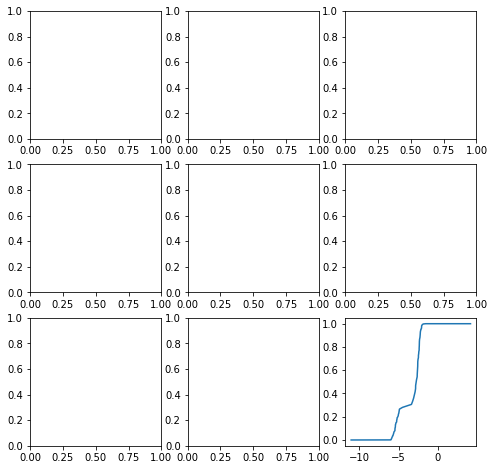

zeros in pVec:3
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:3
Inf in pVec:0
nans in pVec:0
zeros in pVec:3
Inf in pVec:0
nans in pVec:0
zeros in pVec:3
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


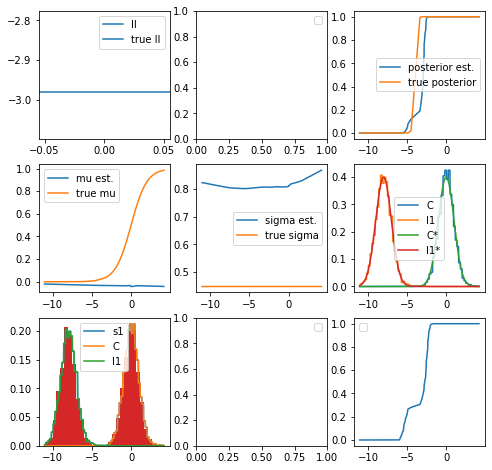

End of Iteration0
zeros in pVec:3
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:3
Inf in pVec:0
nans in pVec:0
zeros in pVec:3
Inf in pVec:0
nans in pVec:0
zeros in pVec:3
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


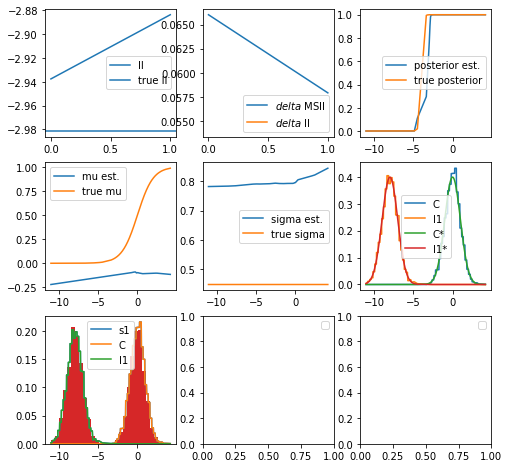

zeros in pVec:3
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


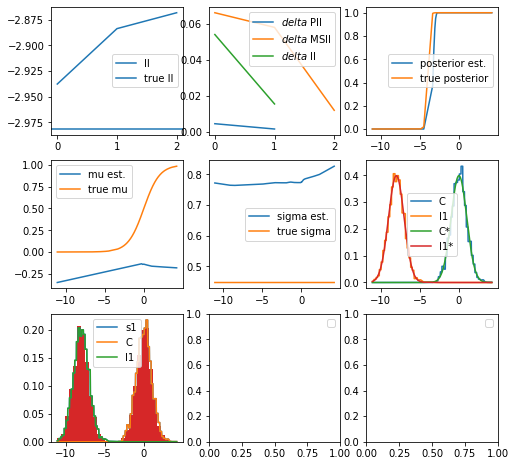

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


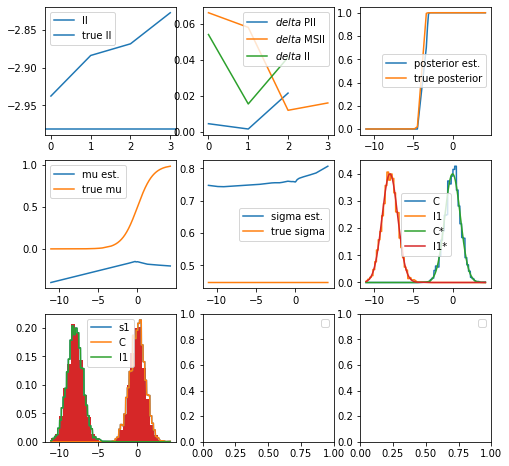

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


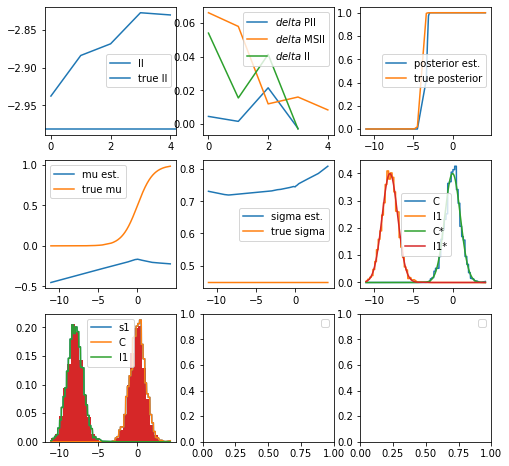

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


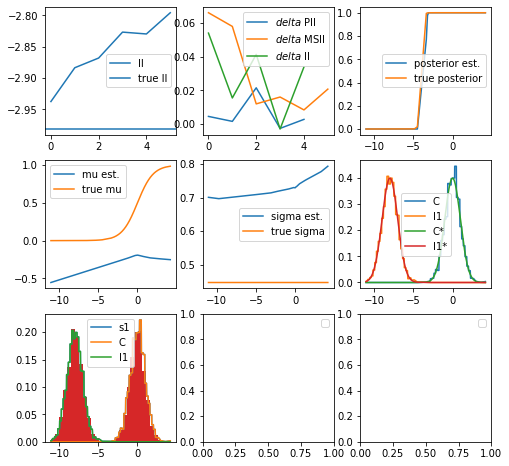

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


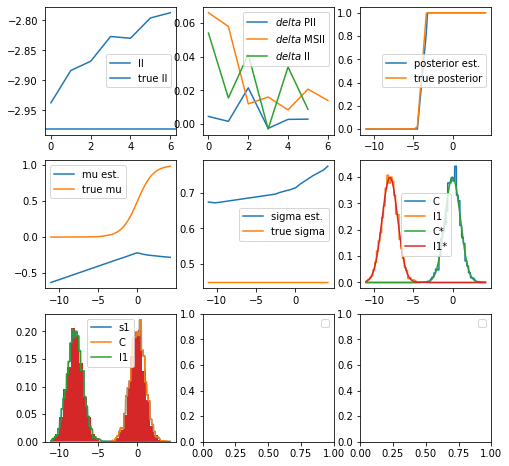

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


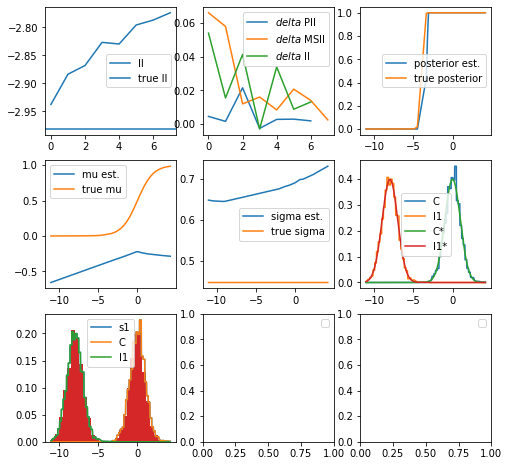

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


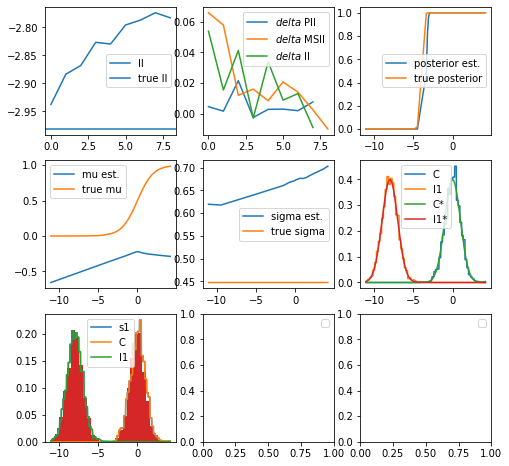

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


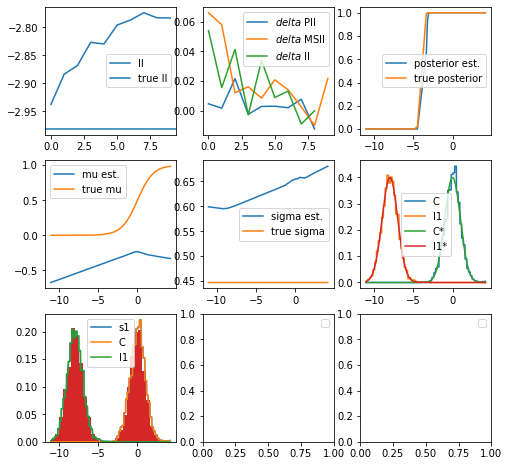

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


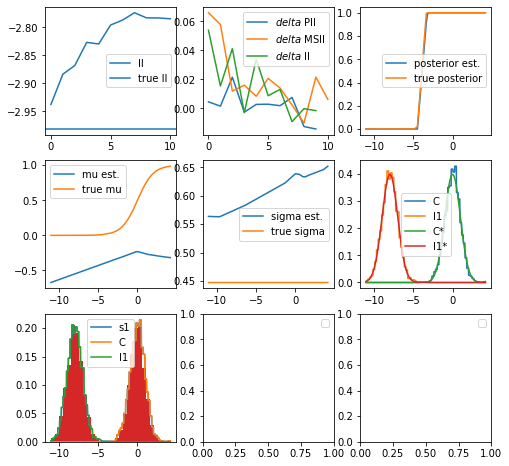

End of Iteration10
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


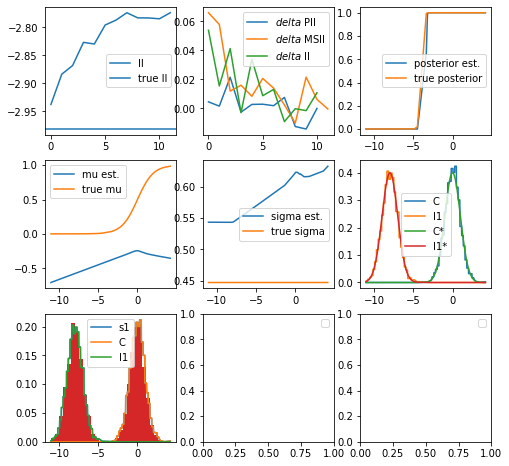

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


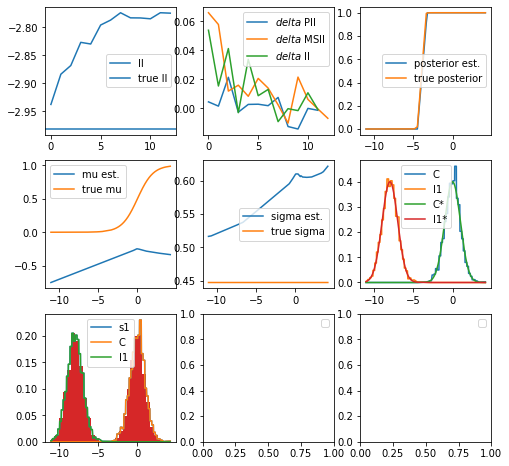

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


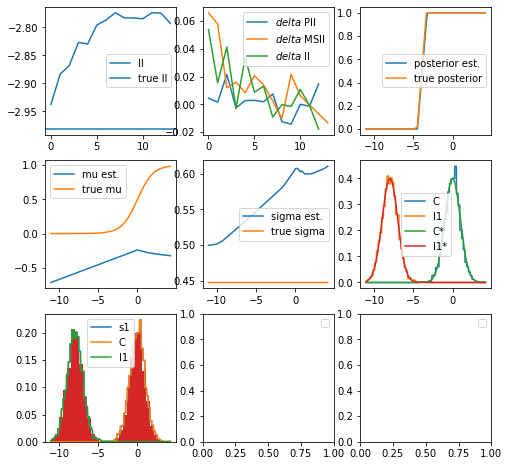

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


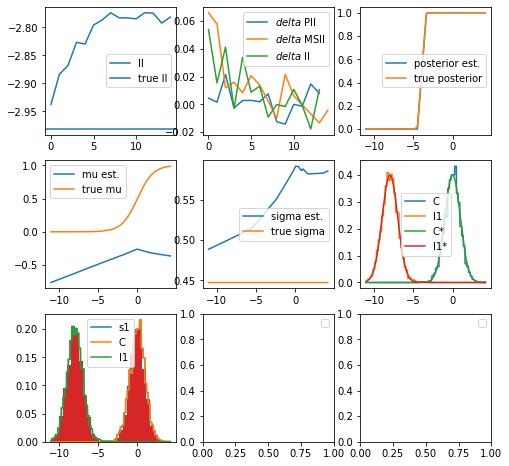

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


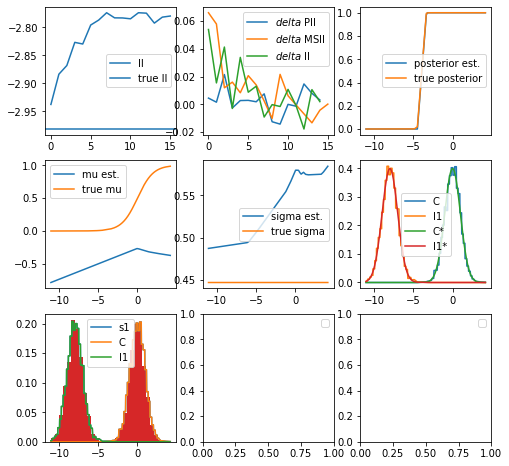

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


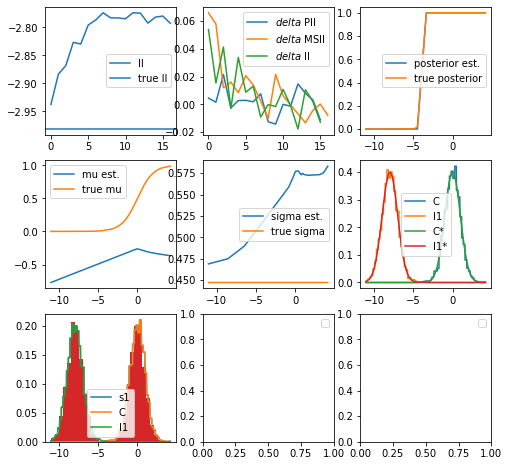

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


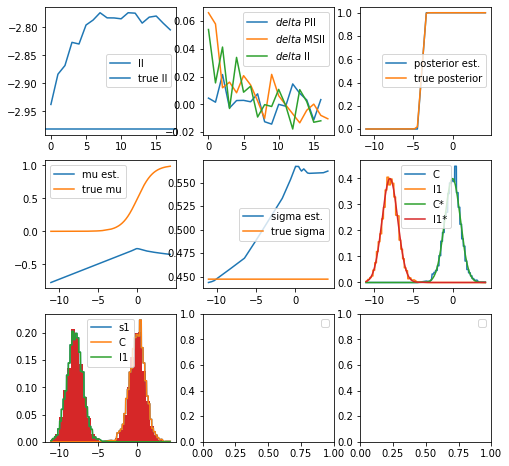

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


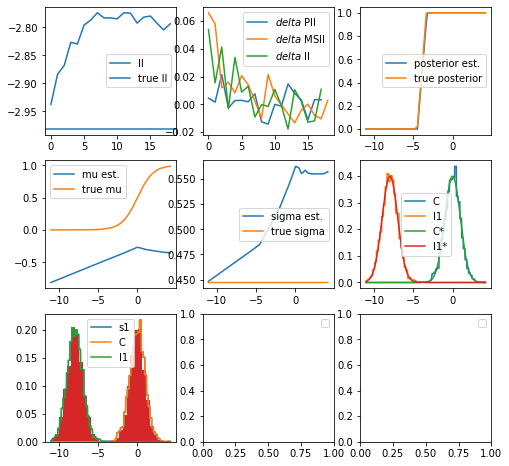

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


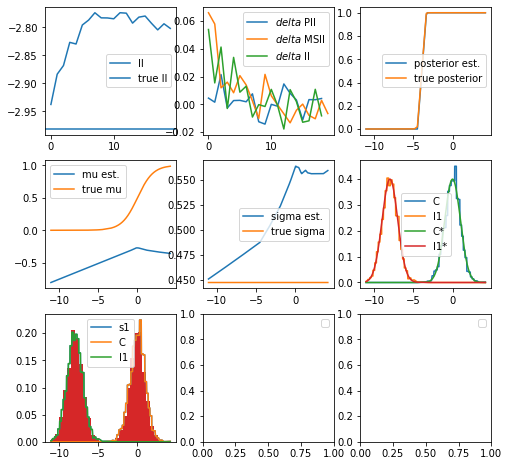

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


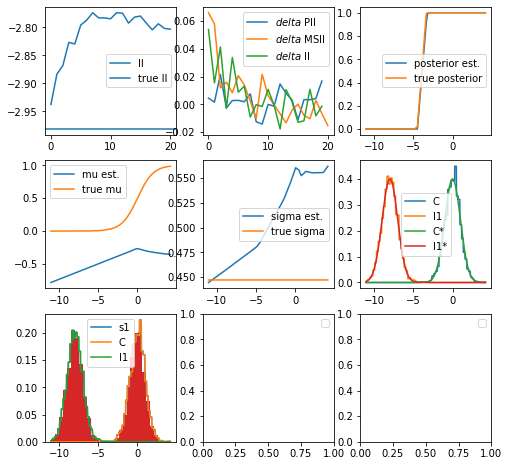

End of Iteration20
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


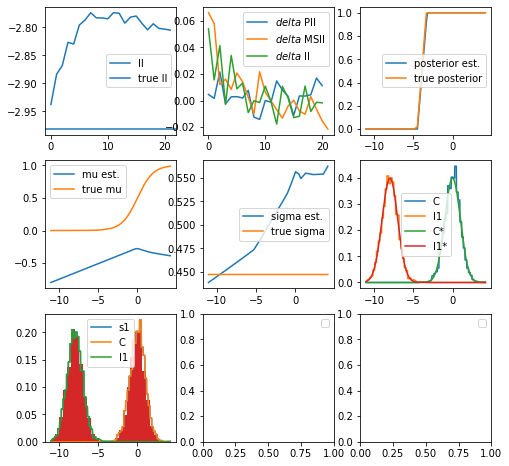

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


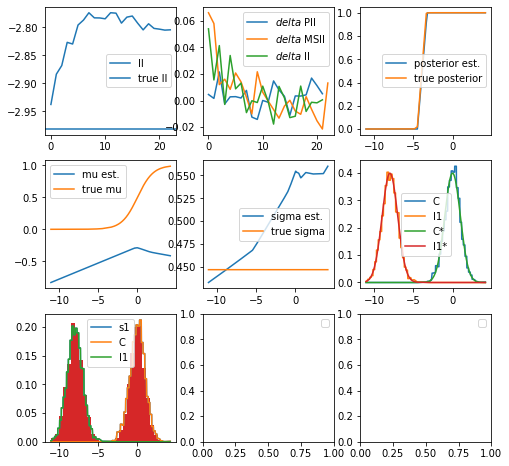

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


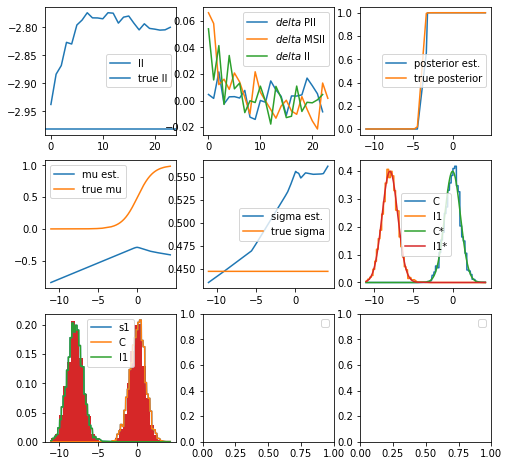

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


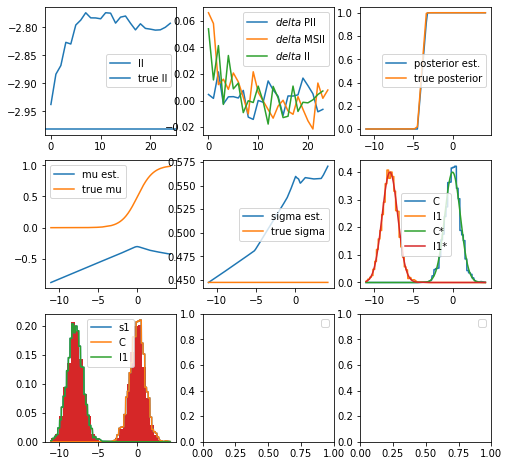

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


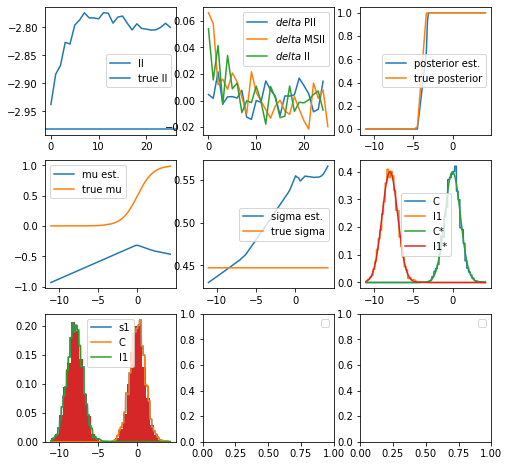

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


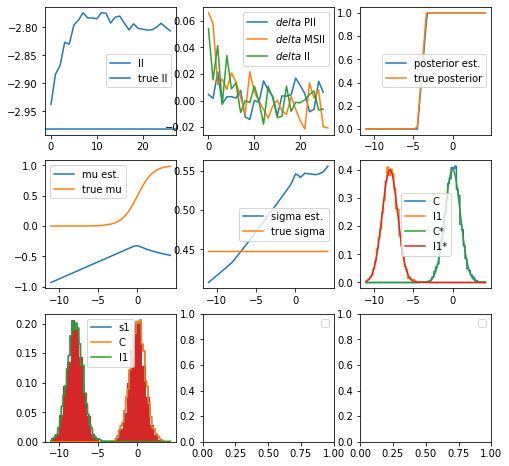

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


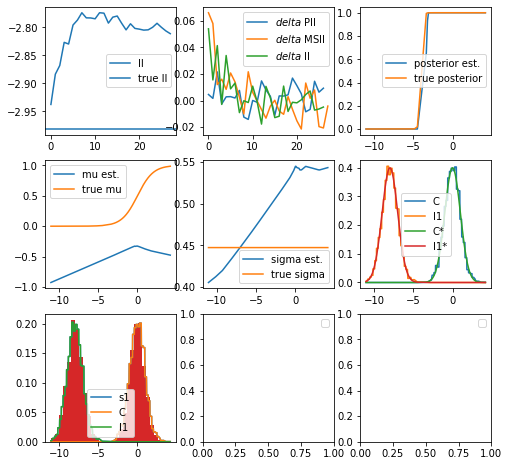

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


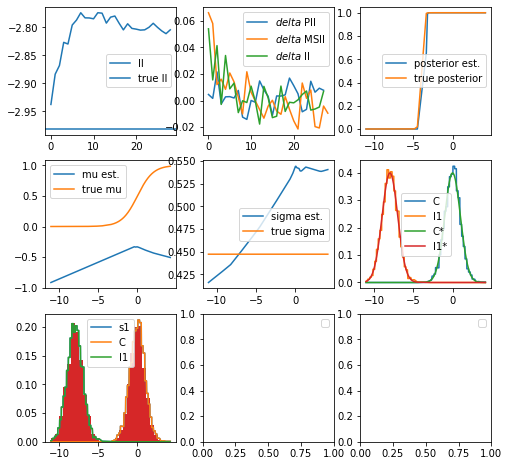

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


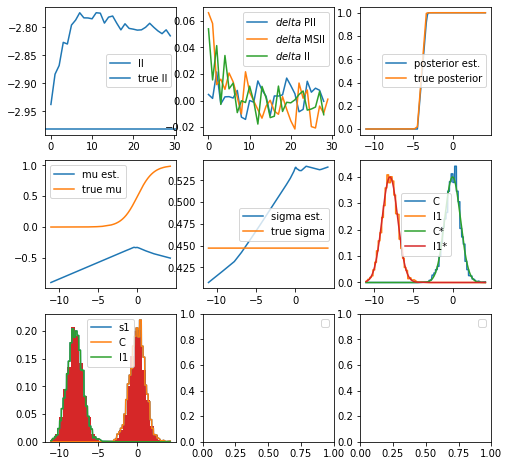

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


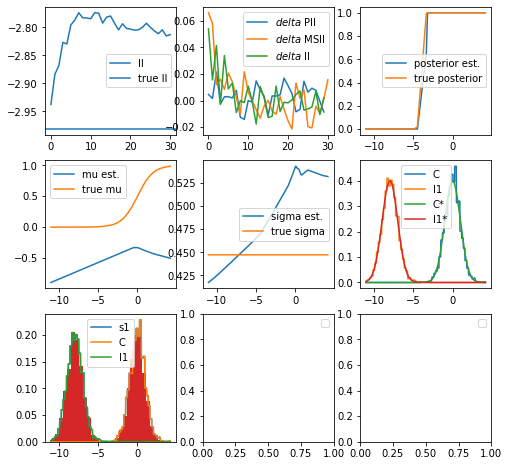

End of Iteration30
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


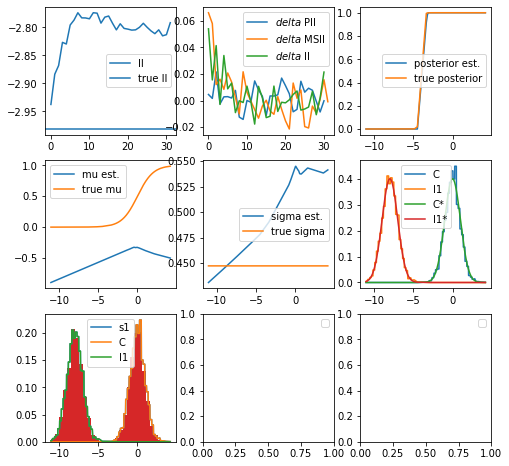

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


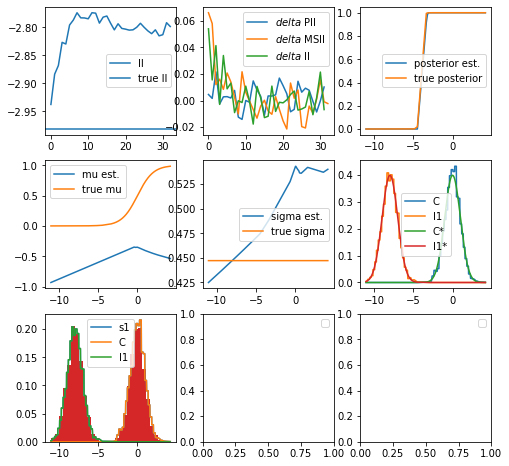

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


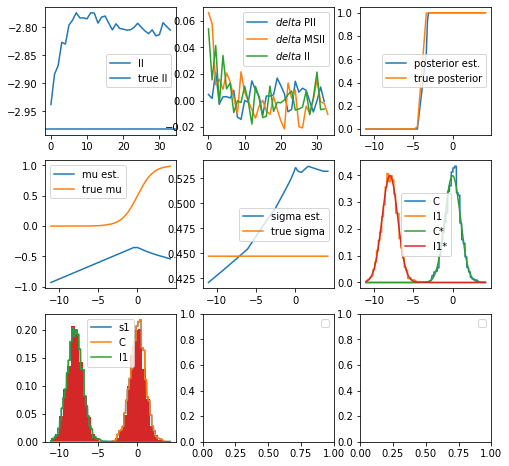

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


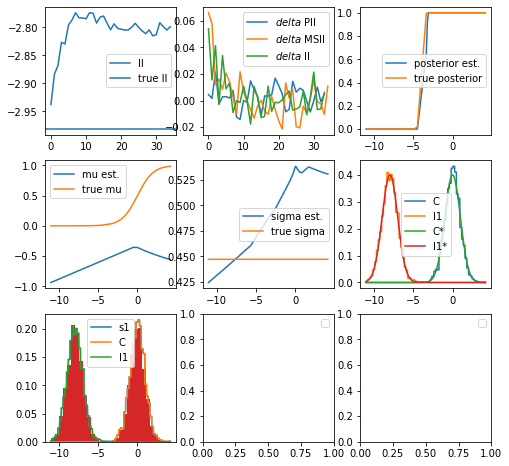

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


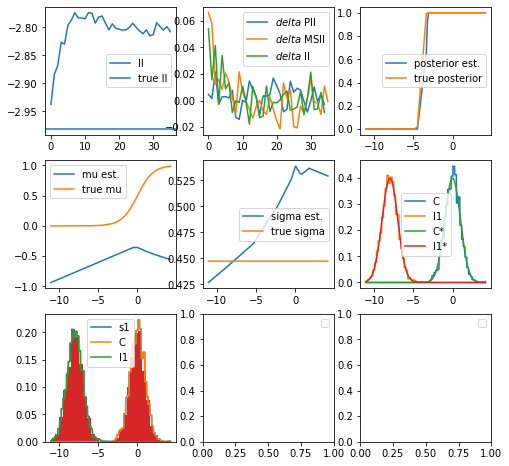

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


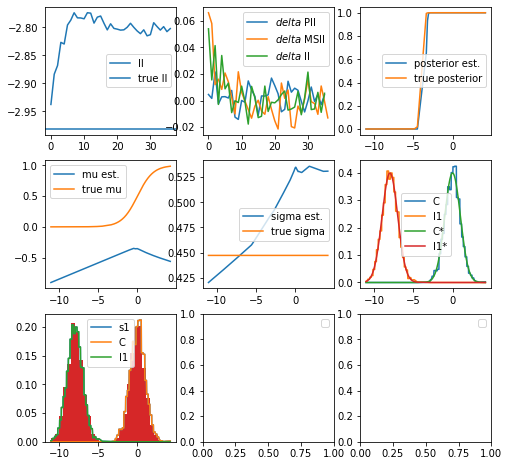

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


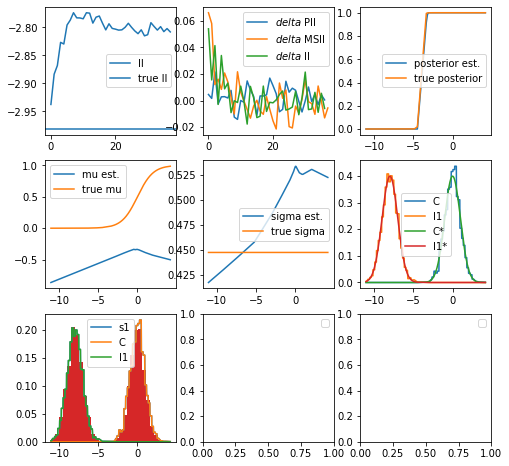

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


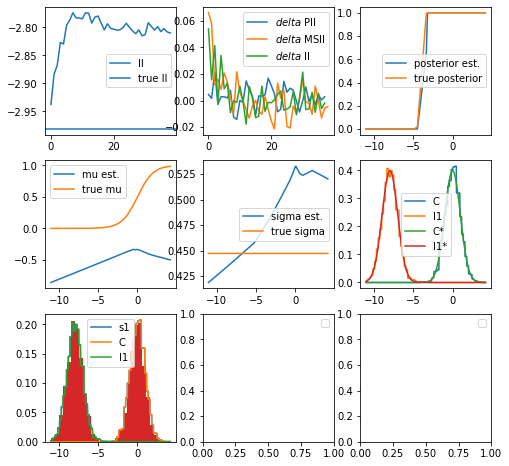

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


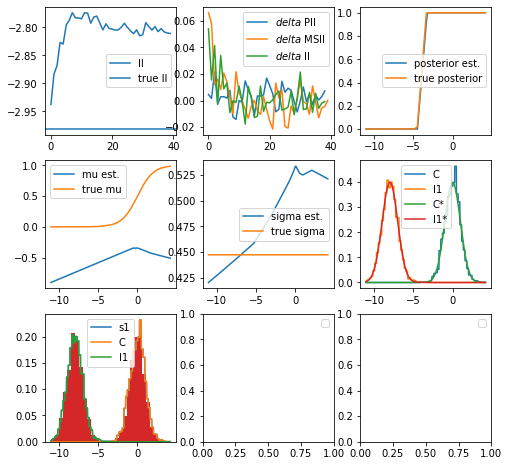

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


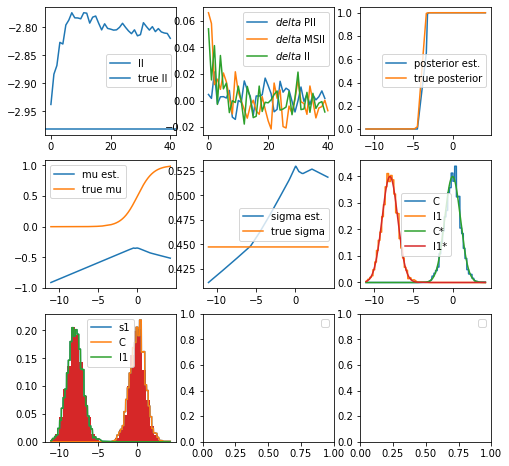

End of Iteration40
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


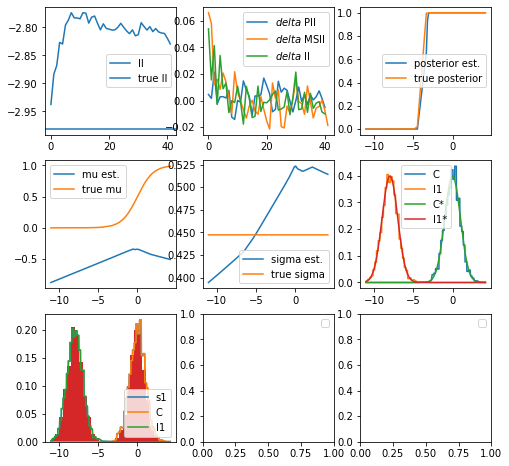

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


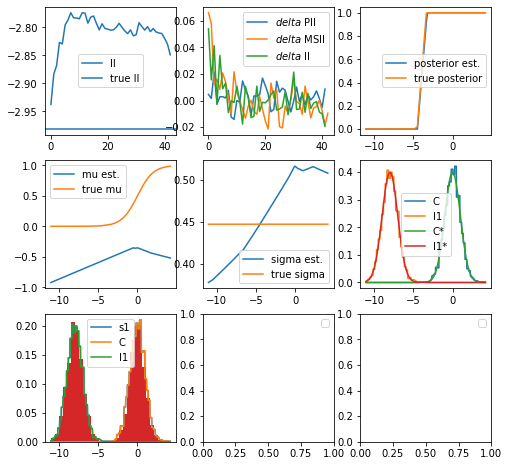

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


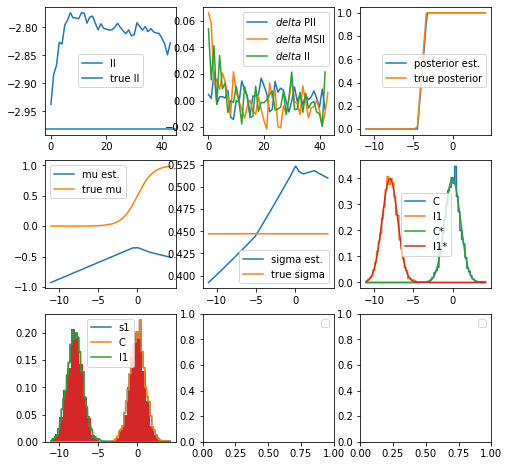

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


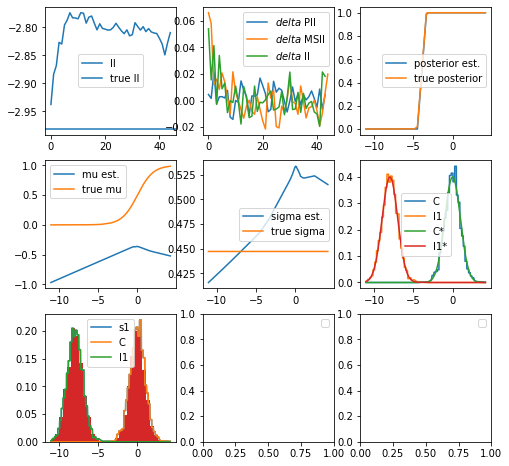

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


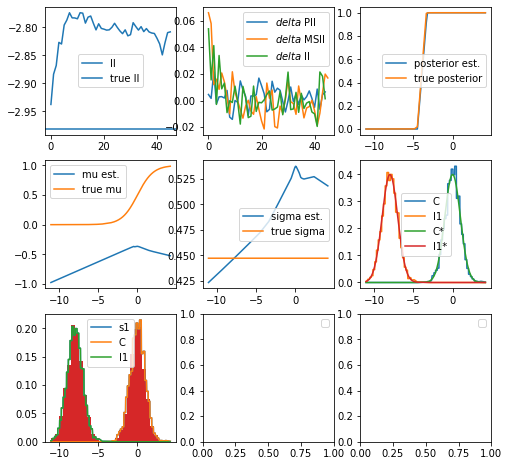

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


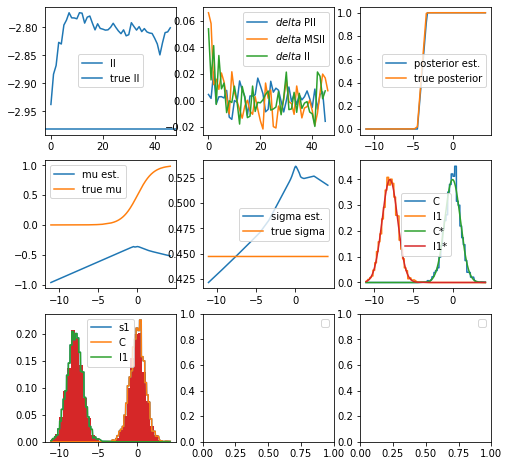

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


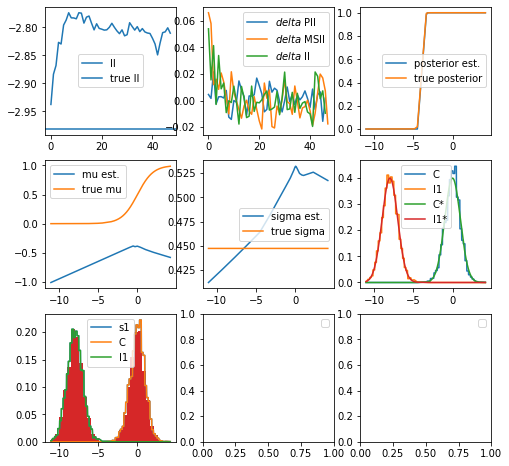

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


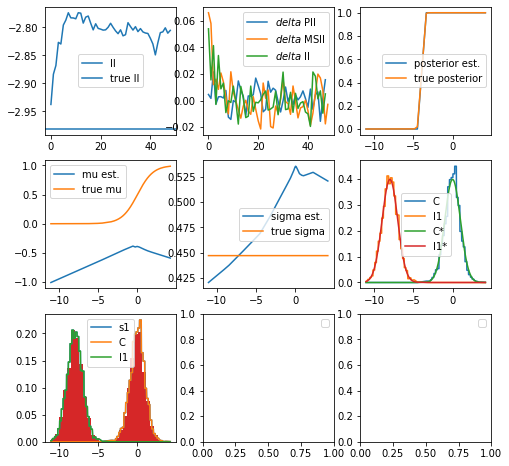

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


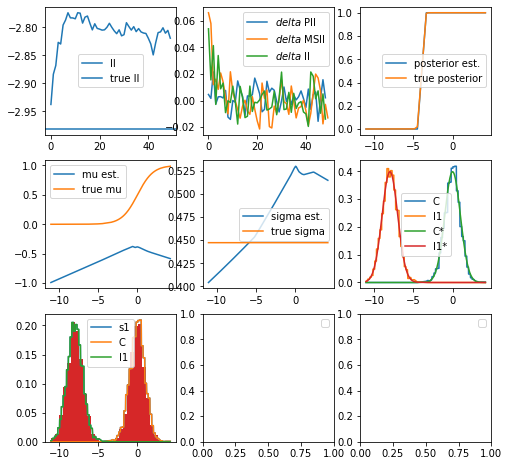

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


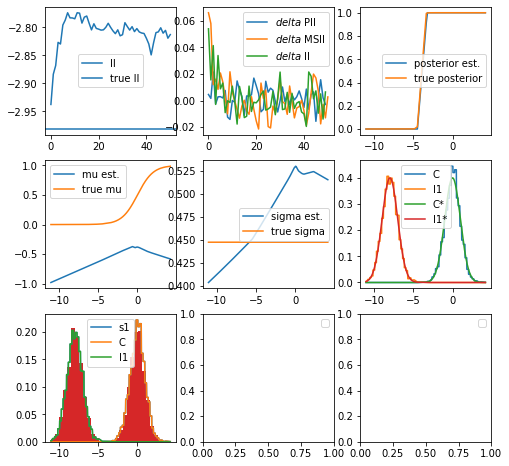

End of Iteration50
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


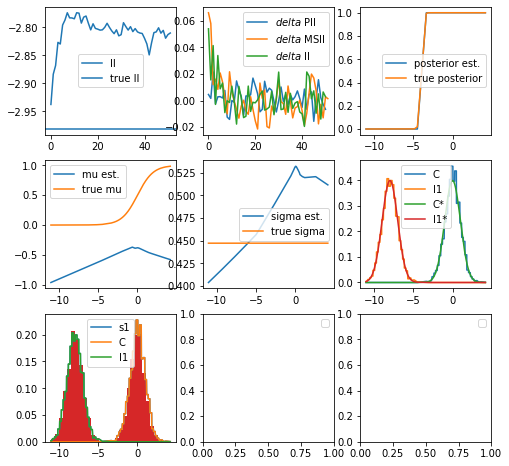

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


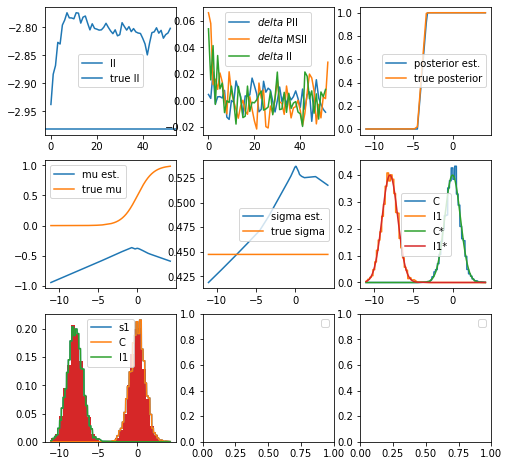

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


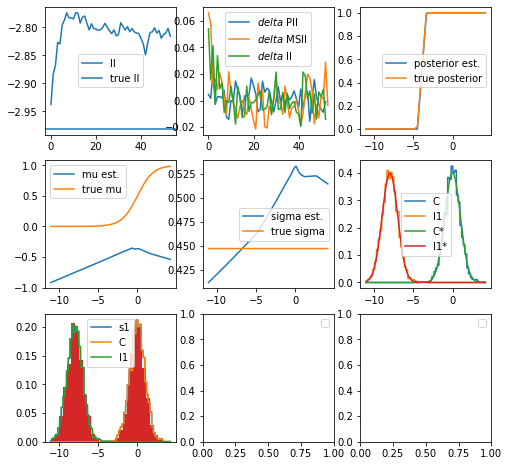

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


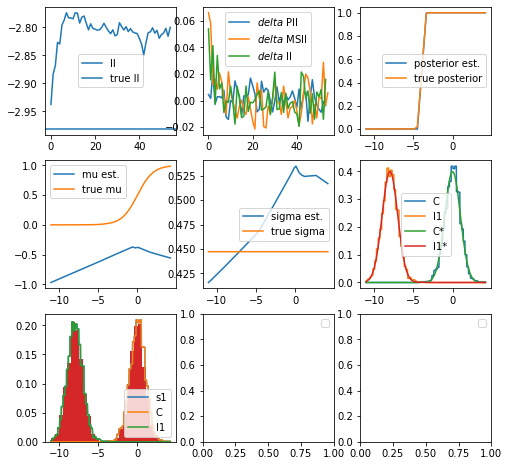

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


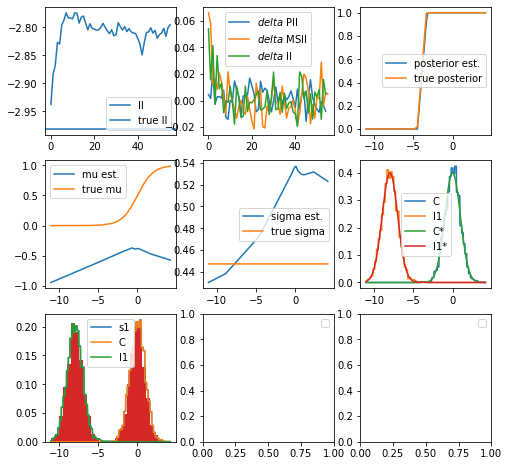

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


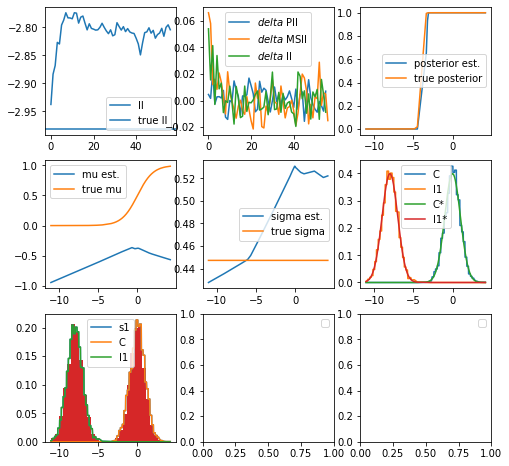

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


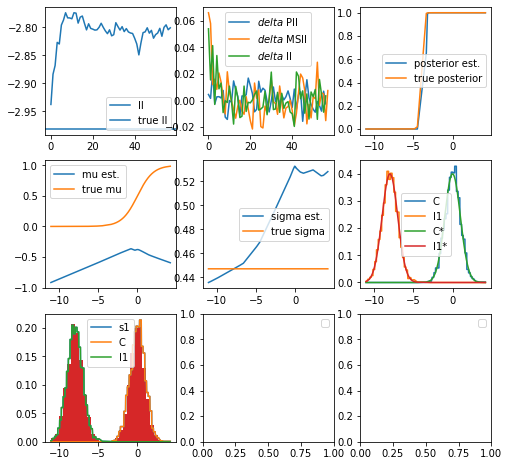

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


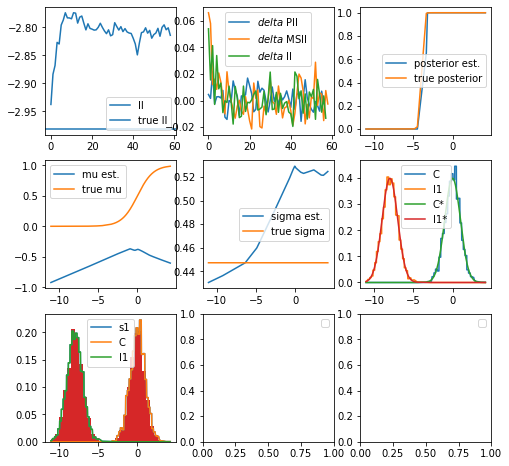

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


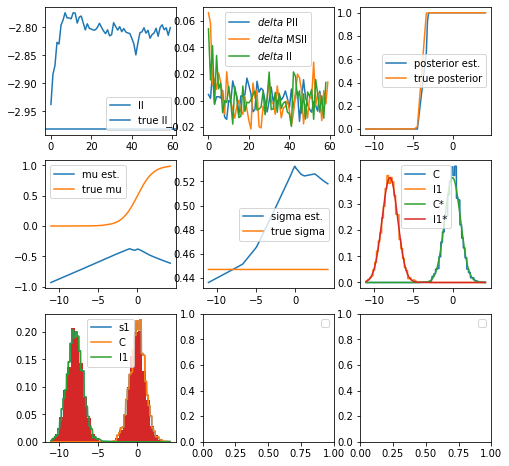

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


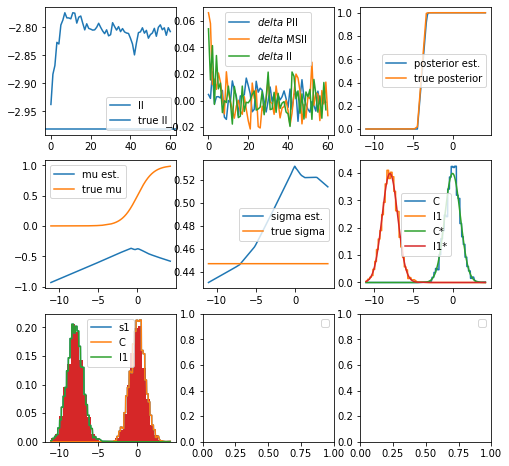

End of Iteration60
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


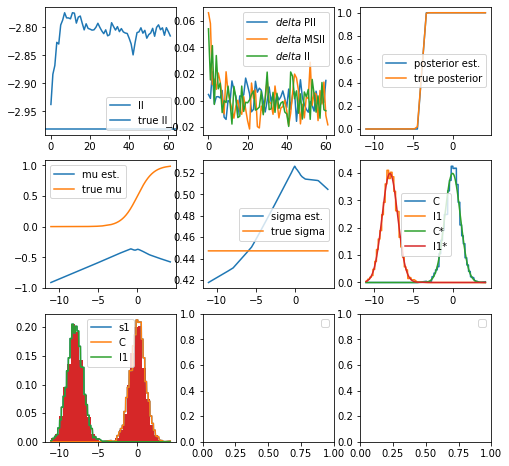

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


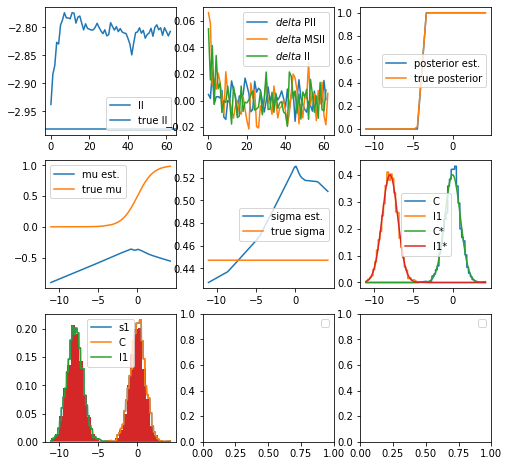

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


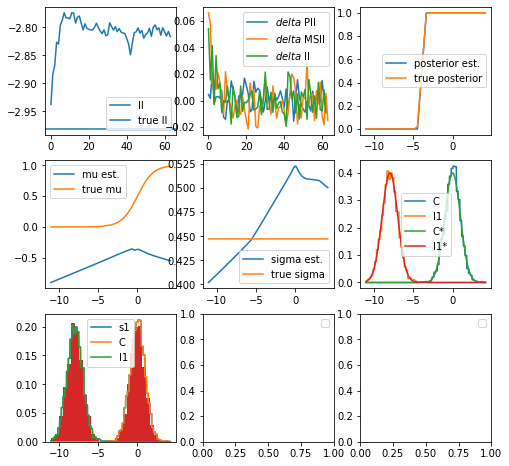

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


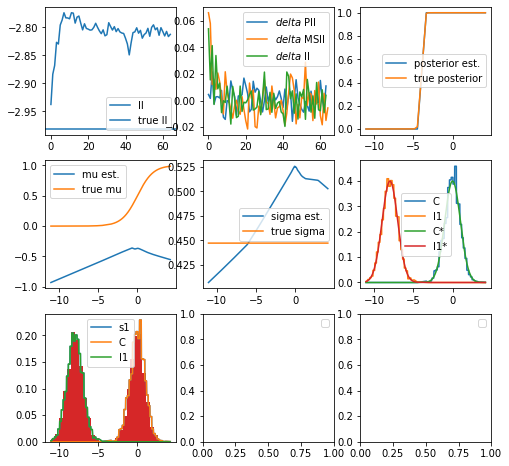

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


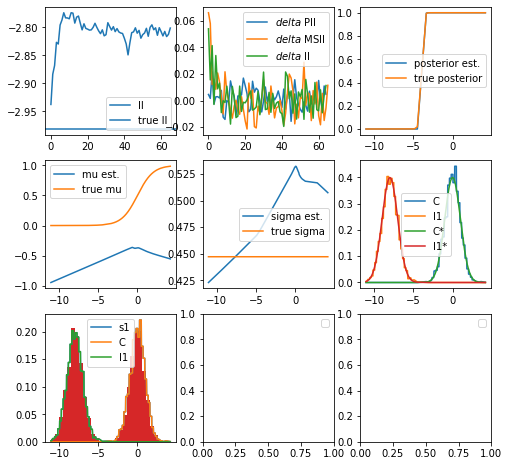

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


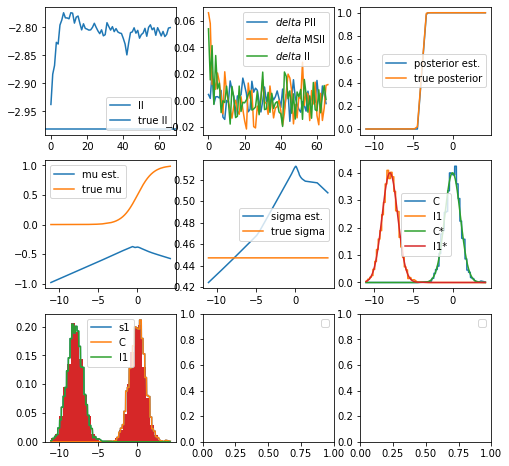

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


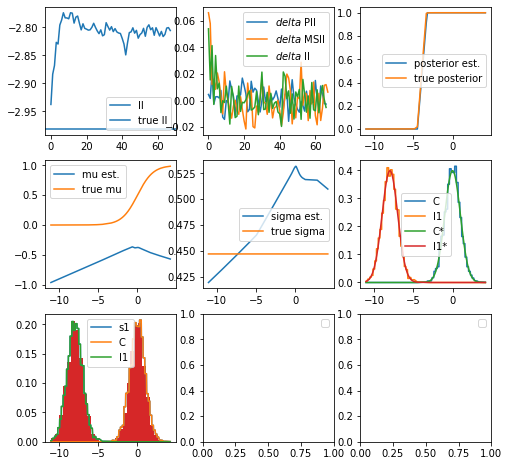

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


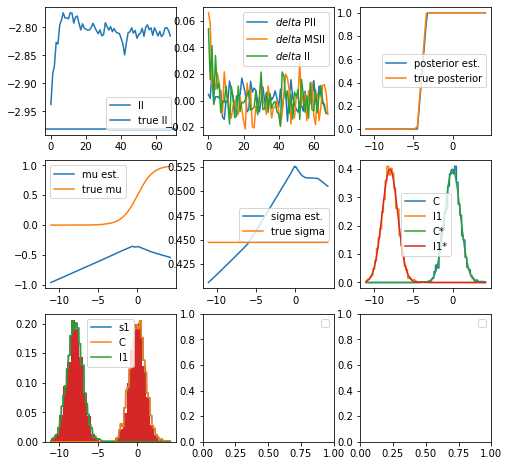

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


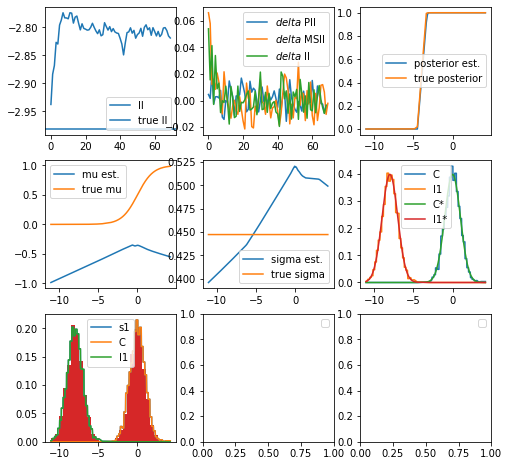

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


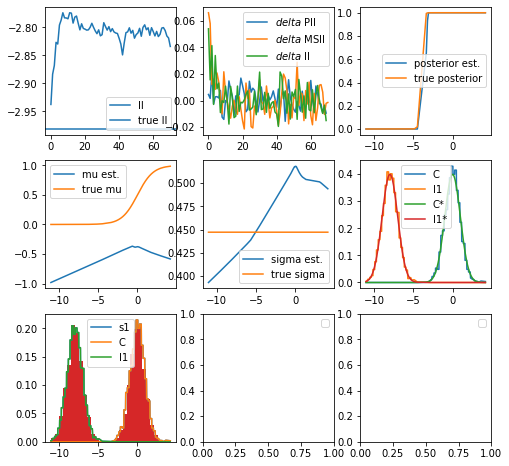

End of Iteration70
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


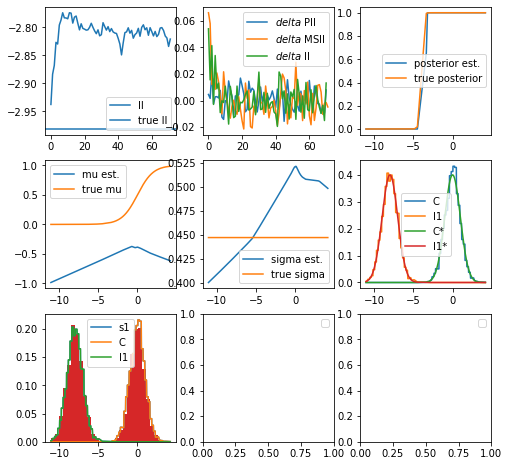

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


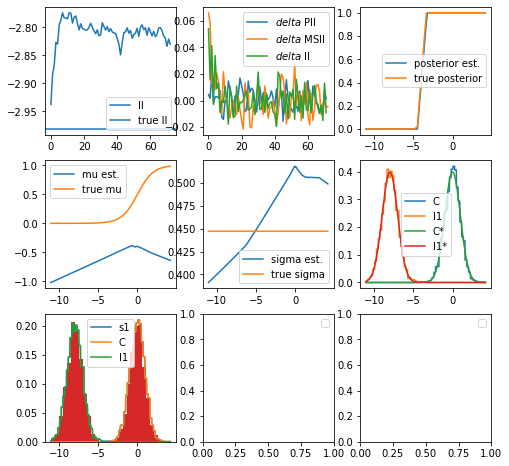

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


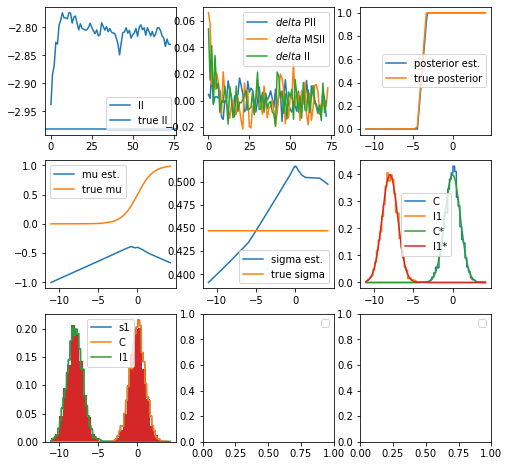

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


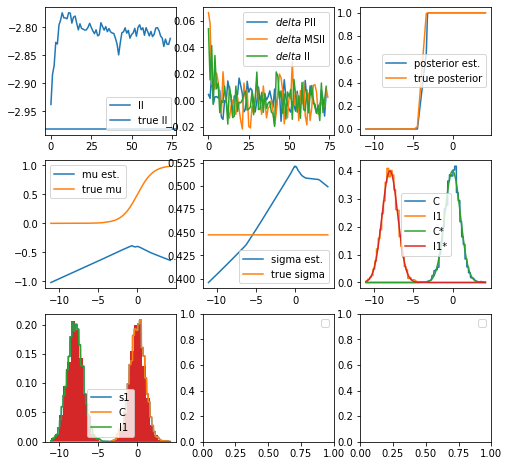

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


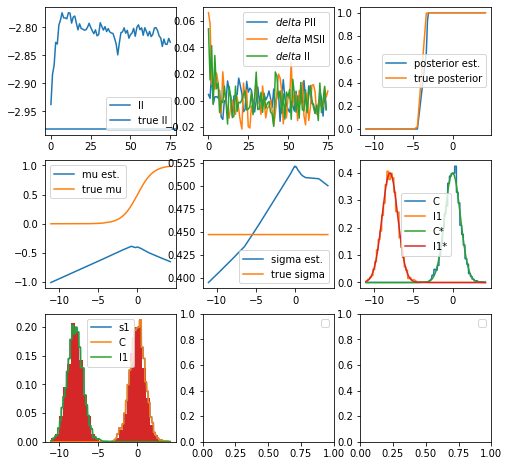

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


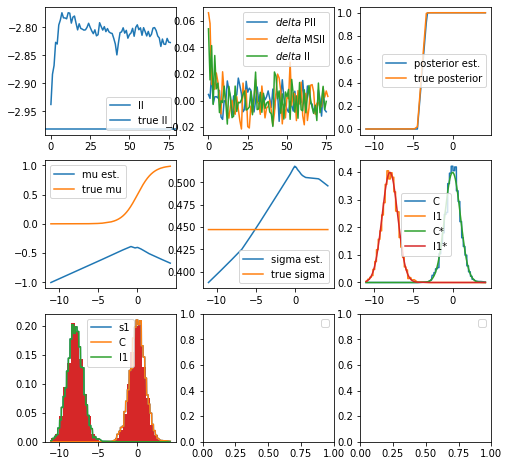

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


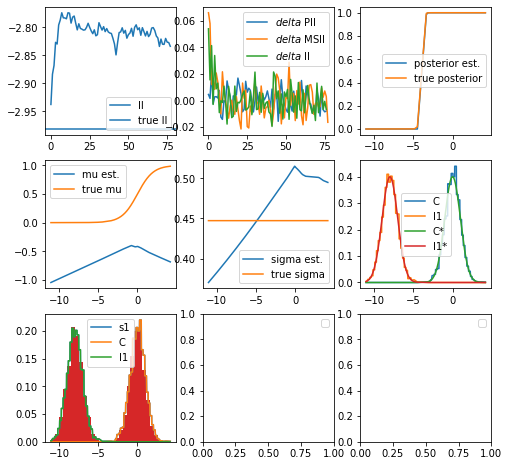

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


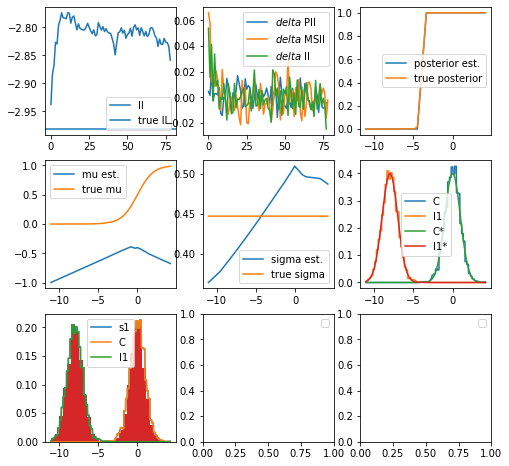

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


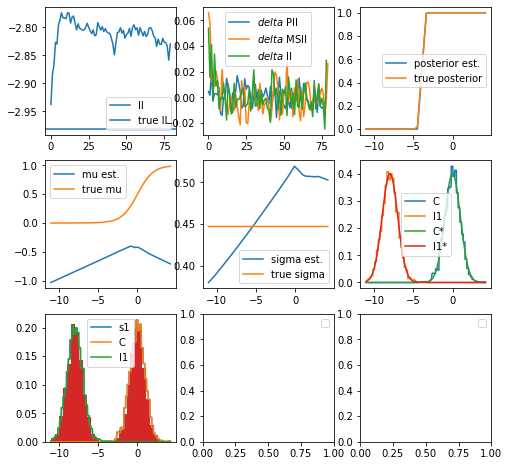

zeros in pVec:1
Inf in pVec:0
nans in pVec:0
after posterior Update
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


No handles with labels found to put in legend.
No handles with labels found to put in legend.


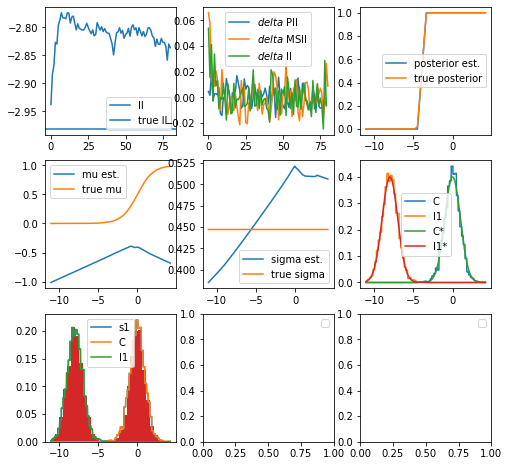

End of Iteration80
zeros in pVec:1
Inf in pVec:0
nans in pVec:0


In [ ]:
from MassSpec.I2GivenI1_NN2.fit import MassSpecFit
#fit = MassSpecFit.demo()
fit = MassSpecFit.demo()


In [ ]:
import numpy as np
a = np.arange(10)
np.where(a < 5)[0]
a.size

In [ ]:
a[a<5]

In [ ]:
np.array([np.random.choice(np.arange(ix1[i], ix2[i]), 1) for i in np.where(ix2 - ix1 > 0)[0]])


In [ ]:
np.random.choice(1,1)

In [ ]:
fit.EM



In [ ]:
import numpy as np
def fun(a):
    a[0:] = a - 5
    return

b = np.ones((5,1))
fun(b.copy())

In [ ]:
str(b)

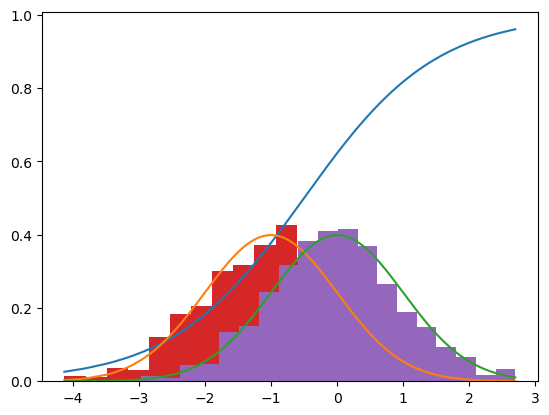

2024-12-24 21:16:40.381583: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-12-24 21:16:40.381602: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-12-24 21:16:40.381605: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-12-24 21:16:40.381640: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-24 21:16:40.381653: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Iteration0
> /Users/shajain/Library/CloudStorage/OneDrive-NortheasternUniversity/Box Sync/code/monotonicPosterior/MonotonicPosterior/Net.py(52)lossTF()
     50         #loss = tf.reduce_mean((y-posterior)**2)
     51         pdb.set_trace()
---> 52         return loss
     53 
     54     def gradients(self, x, y, batchSize):



ipdb>  loss


<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545,
       0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545,
       0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545,
       0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545,
       0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545,
       0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545,
       0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545,
       0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545,
       0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545,
       0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545,
       0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545,
       0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545,
       0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545, 0.6855545,
  

ipdb>  tf.keras.losses.binary_crossentropy(y.flatten(), posterior.flatten())


*** AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'flatten'


ipdb>  y


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

ipdb>  y.shape


(1000, 1)


ipdb>  posterior.shape


TensorShape([1000, 1])


ipdb>  y.flatten()


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
from MonotonicPosterior.fit import PosteriorFitting
PosteriorFitting.demo()